## MVP_eng_dados_PUC_Rio_2025

### Trabalho de conclusão da sprint Engenharia de Dados da especialização em Ciência de Dados e Analytics da Puc-Rio.
### O objetivo deste trabalho é criar um pipeline de extração, limpeza e análise de dados.


In [0]:
dbutils.fs.mkdirs("dbfs:/FileStore/mvp_eng_dados_puc_rio_2025")

Out[2]: True

In [0]:
dbutils.fs.ls("dbfs:/FileStore")

Out[8]: [FileInfo(path='dbfs:/FileStore/mvp_eng_dados_puc_rio_2025/', name='mvp_eng_dados_puc_rio_2025/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/', name='shared_uploads/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/teste/', name='teste/', size=0, modificationTime=0)]

In [0]:
dbutils.fs.ls("dbfs:/FileStore/tables")

Out[9]: [FileInfo(path='dbfs:/FileStore/tables/EmendasParlamentares-1.csv', name='EmendasParlamentares-1.csv', size=40940809, modificationTime=1742423074000),
 FileInfo(path='dbfs:/FileStore/tables/EmendasParlamentares.csv', name='EmendasParlamentares.csv', size=40940809, modificationTime=1742423017000)]

In [0]:
#check files
display(dbutils.fs.ls("dbfs:/FileStore/tables/"))

path,name,size,modificationTime
dbfs:/FileStore/tables/EmendasParlamentares-1.csv,EmendasParlamentares-1.csv,40940809,1742423074000
dbfs:/FileStore/tables/EmendasParlamentares.csv,EmendasParlamentares.csv,40940809,1742423017000


- ORIGEM
https://portaldatransparencia.gov.br/emendas/visao-geral

- DICIONÁRIO DE TERMOS https://portaldatransparencia.gov.br/dicionario-de-dados-emendas-parlamentares

- GLOSSÁRIO
https://portaldatransparencia.gov.br/glossario

# Perguntas Iniciais

- 1) Top 5 maiores relatores de emendas em número de emendas
- 2) Top 5 maiores relatores de emendas em valor pago
- 3) quais subfunções que receberam mais dinheiro?
- 4) quais local_destino receberam mais dinheiro?
- 5) quais local_destino receberam menos dinheiro?
- 6) quais regiões receberam mais dinheiro e quanto receberam?
- 7) quais regiões receberam menos dinheiro e quanto receberam?
- 8) qual a tendência do valor total pago nos últimos 5 anos?
- 9) qual o volume em dinheiro das emendas de relator em 2024?
- 10) qual a tendência do volume das emendas de relator nos últimos 5 anos?


In [0]:
df_bronze_pyspark = spark.read.option("header", "true") \
                             .option("sep", ";") \
                             .option("encoding", "ISO-8859-1") \
                             .csv("dbfs:/FileStore/tables/EmendasParlamentares-1.csv")

df_bronze = df_bronze_pyspark.toPandas()
df_bronze.sample(3)

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade de aplicação do recurso,Código Município IBGE,Município,Código UF IBGE,...,Código Ação,Nome Ação,Código Plano Orçamentário,Nome Plano Orçamentário,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos
76404,202471230010,2024,Emenda de Bancada,7123,BANCADA DE RONDONIA,0010,ESPIGÃO D'OESTE - RO,1100098,ESPIGÃO D'OESTE,1100000,...,1211,IMPLEMENTACAO DE INFRAESTRUTURA BASICA NOS MUN...,0000,IMPLEMENTACAO DE INFRAESTRUTURA BASICA NOS MUN...,"28000000,00","0,00","0,00","55575608,48","0,00","424391,52"
11708,201528620010,2015,Emenda Individual - Transferências com Finalid...,2862,BOHN GASS,0010,MÚLTIPLO,Sem informação,Múltiplo,4300000,...,10V0,APOIO A PROJETOS DE INFRAESTRUTURA TURISTICA,0000,APOIO A PROJETOS DE INFRAESTRUTURA TURISTICA -...,"250000,00","0,00","0,00","0,00","0,00","250000,00"
11611,201528600009,2015,Emenda Individual - Transferências com Finalid...,2860,ASSIS MELO,0009,NOVA PÁDUA - RS,4313086,NOVA PÁDUA,4300000,...,152M,AQUISICAO DE MAQUINAS E EQUIPAMENTOS PARA ADEQ...,0000,AQUISICAO DE MAQUINAS E EQUIPAMENTOS PARA ADEQ...,"300000,00","0,00","0,00","0,00","0,00","300000,00"


In [0]:
print(df_bronze.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82609 entries, 0 to 82608
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Código da Emenda                    82609 non-null  object
 1   Ano da Emenda                       82609 non-null  object
 2   Tipo de Emenda                      82609 non-null  object
 3   Código do Autor da Emenda           82609 non-null  object
 4   Nome do Autor da Emenda             82609 non-null  object
 5   Número da emenda                    82609 non-null  object
 6   Localidade de aplicação do recurso  82609 non-null  object
 7   Código Município IBGE               82609 non-null  object
 8   Município                           82609 non-null  object
 9   Código UF IBGE                      82609 non-null  object
 10  UF                                  82609 non-null  object
 11  Região                              82609 non-null  ob

## Qualidade de dados

### Investigando as emendas sem código

In [0]:
### Investigando as emendas sem código
print("Numero de emendas sem código: ", len(df_bronze[df_bronze["Código da Emenda"] == "Sem informação"]))

# tipos de emenda - descartando correlação de emendas sem código com seus tipos
print("Tipos de emendas com código: ", len(df_bronze["Tipo de Emenda"].unique()))
print("Tipose de emendas sem código: ", len(df_bronze[df_bronze["Código da Emenda"] == "Sem informação"]["Tipo de Emenda"].unique()))
print()

# em relação ao ano
print("Datas das emendas: ", df_bronze["Ano da Emenda"].unique())
print("Emendas sem código em: ", df_bronze[df_bronze["Código da Emenda"] == "Sem informação"]["Ano da Emenda"].unique())

Numero de emendas sem código:  17736
Tipos de emendas com código:  5
Tipose de emendas sem código:  4

Datas das emendas:  ['2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023'
 '2024']
Emendas sem código em:  ['2014' '2015' '2016' '2017' '2018' '2019' '2020']


### Organização e limpeza dos dados I

In [0]:
df_silver = df_bronze.copy()

# Convertendo os dtypes automaticamente para os mais adequados
df_silver = df_silver.convert_dtypes()

#
df_silver["Ano da Emenda"] = df_silver["Ano da Emenda"].astype(int)

# Removendo os anos em que há emendas sem código
df_silver = df_silver[df_silver["Ano da Emenda"] >= 2021]

# removendo demais informações irrelevantes para a análise
df_silver = df_silver.drop(columns=["Valor Restos A Pagar Inscritos",
                                    "Valor Restos A Pagar Cancelados",
                                    "Valor Restos A Pagar Pagos",
                                    "Valor Pago",
                                    "Valor Liquidado",
                                    "Nome Ação",
                                    "Nome Programa",
                                    "Nome Plano Orçamentário",
                                    "Nome Função",
                                    "Número da emenda",
                                    "Código do Autor da Emenda",
                                    "Código Município IBGE",
                                    "Código UF IBGE",
                                    "Código Função",
                                    "Código Subfunção",
                                    "Código Programa",
                                    "Código Ação",
                                    "Código Plano Orçamentário"])

# Mudando o nome das colunas
map = {
    "Código da Emenda": "codigo_emenda",
    "Ano da Emenda": "ano_emenda",
    "Tipo de Emenda": "tipo_emenda",
    "Nome do Autor da Emenda": "nome_autor",
    "Número da Emenda": "numero_emenda",
    "Localidade de aplicação do recurso": "local_destino",
    "Município": "municipio",
    "UF": "uf",
    "Região": "regiao",
    "Nome Subfunção": "subfuncao",
    "Valor Empenhado": "valor_empenhado"
    }

df_silver = df_silver.rename(columns=map)

# convertendo as colunas de valores para float
df_silver["valor_empenhado"] = df_silver["valor_empenhado"].str.replace(',', '.').astype(float)

df_silver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25803 entries, 56806 to 82608
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   codigo_emenda    25803 non-null  string 
 1   ano_emenda       25803 non-null  int64  
 2   tipo_emenda      25803 non-null  string 
 3   nome_autor       25803 non-null  string 
 4   local_destino    25803 non-null  string 
 5   municipio        25803 non-null  string 
 6   uf               25803 non-null  string 
 7   regiao           25803 non-null  string 
 8   subfuncao        25803 non-null  string 
 9   valor_empenhado  25803 non-null  float64
dtypes: float64(1), int64(1), string(8)
memory usage: 2.2 MB


In [0]:
df_silver.sample(5)

,codigo_emenda,ano_emenda,tipo_emenda,nome_autor,local_destino,municipio,uf,regiao,subfuncao,valor_empenhado
77703,202443500009,2024,Emenda Individual - Transferências com Finalid...,DELEGADO PAULO BILYNSKYJ,MÚLTIPLO,Múltiplo,SÃO PAULO,Sudeste,Assistência comunitária,1000000.0
72721,202327450021,2023,Emenda Individual - Transferências Especiais,JOSE NUNES,FIRMINO ALVES - BA,FIRMINO ALVES,BAHIA,Nordeste,Outras transferências,1547748.0
64158,202271080014,2022,Emenda de Bancada,BANCADA DO DISTRITO FEDERAL,DISTRITO FEDERAL (UF),Sem informação,DISTRITO FEDERAL,Centro-Oeste,Policiamento,30352174.0
82147,202442790007,2024,Emenda Individual - Transferências com Finalid...,TEREZA CRISTINA,CAMPO GRANDE - MS,CAMPO GRANDE,MATO GROSSO DO SUL,Centro-Oeste,Assistência comunitária,200000.0
67021,202237040003,2022,Emenda Individual - Transferências com Finalid...,LUCAS VERGILIO,CAMPOS VERDES - GO,CAMPOS VERDES,GOIÁS,Centro-Oeste,Atenção básica,108483.0


### Analisando valores faltantes

In [0]:
# Entendendo as variáveis categóricas
print(df_silver["tipo_emenda"].value_counts(), "\n")
print(df_silver["local_destino"].value_counts(), "\n")
print(df_silver["regiao"].value_counts(), "\n")
print(df_silver["municipio"].value_counts())

Emenda Individual - Transferências com Finalid...    20666
Emenda Individual - Transferências Especiais          3484
Emenda de Bancada                                     1417
Emenda de Comissão                                     182
Emenda de Relator                                       54
Name: tipo_emenda, dtype: Int64 

MÚLTIPLO                    9979
Nacional                    2000
RIO DE JANEIRO (UF)          964
SÃO PAULO (UF)               938
MINAS GERAIS (UF)            689
                            ... 
BELA VISTA DE MINAS - MG       1
CATOLÉ DO ROCHA - PB           1
ENGENHEIRO BELTRÃO - PR        1
ITAJU - SP                     1
ANAPU - PA                     1
Name: local_destino, Length: 1986, dtype: Int64 

Sudeste         8098
Nordeste        6746
Sul             3315
Norte           3091
Centro-Oeste    2170
Nacional        2000
Múltiplo         336
Exterior          47
Name: regiao, dtype: Int64 

Sem informação         10189
Múltiplo                9910
RIO

Algumas informações importtantes e interessantes aparecem.
Por exemplo:
- "Sem informação" aparece como valor nas colunas "municipio" e "uf"

- Em "regiao" além das regiões do país aparecem as informações "nacional", "múltipl" e, curiosamente, "exterior".

- o valor "múltiplo" ocorre com formatações distintas (Múltiplo e MÚLTIPLO)

In [0]:
# Valores faltantes nas informações de lugar
print((df_silver["local_destino"] == "Sem informação").value_counts(), "\n")

print((df_silver["regiao"] == "Sem informação").value_counts(), "\n")

print((df_silver["uf"] == "Sem informação").value_counts(), "\n")

print((df_silver["municipio"] == "Sem informação").value_counts())

False    25803
Name: local_destino, dtype: Int64 

False    25803
Name: regiao, dtype: Int64 

False    23647
True      2156
Name: uf, dtype: Int64 

False    15614
True     10189
Name: municipio, dtype: Int64


In [0]:
# verificando se municípios e UFs sem informação então preenchidas em local_destino

df_silver[df_silver["uf"] == "Sem informação"][["uf","municipio","local_destino"]].value_counts()

Out[22]: uf              municipio       local_destino
Sem informação  Sem informação  Nacional         2000
                                Exterior           47
                                Sul                30
                                Centro-Oeste       29
                                Norte              19
                                Nordeste           16
                                Sudeste            15
dtype: int64

Fica claro que os valores faltantes em "uf" e "municipo" não são decorrentes de falha, e sim por que estas emendas abrangem grupos maiores de lugares.
Não há necessidade de tratamento nesse caso

In [0]:
(df_silver["municipio"] == "Múltiplo").value_counts()

Out[23]: False    15893
True      9910
Name: municipio, dtype: Int64

### Organização e limpeza dos dados II

In [0]:
# Padronizando a categoria "múltiplo"
df_silver["local_destino"] = df_silver['local_destino'].replace('MÚLTIPLO', 'Múltiplo')

# Transformando "Sem informação" em "Múltiplo" nas categorias municipio e uf
df_silver["municipio"] = df_silver["municipio"].replace("Sem informação", "Múltiplo")
df_silver["uf"] = df_silver["uf"].replace("Sem informação", "Múltiplo")

### O código das emendas é realmente único?

In [0]:
# A coluna tem apenas valores únicos?
print("codigo_emenda possui apenas valores únicos? ", df_silver["codigo_emenda"].is_unique)

# Quantidade de valores duplicados
contagem = df_silver['codigo_emenda'].value_counts()
print("Quantidade de emendas com código igual: ", len(contagem[contagem > 1]))

# Verificando os valores duplicados
codigo_emenda_duplicado = df_silver[df_silver['codigo_emenda'].duplicated(keep=False)]
codigo_emenda_duplicado.head(4)

codigo_emenda possui apenas valores únicos?  False
Quantidade de emendas com código igual:  55


,codigo_emenda,ano_emenda,tipo_emenda,nome_autor,local_destino,municipio,uf,regiao,subfuncao,valor_empenhado
70490,202330610003,2023,Emenda Individual - Transferências com Finalid...,CACA LEAO,BAHIA (UF),Múltiplo,BAHIA,Nordeste,Promoção da produção agropecuária,440000.00
70491,202330610003,2023,Emenda Individual - Transferências Especiais,CACA LEAO,Múltiplo,Múltiplo,BAHIA,Nordeste,Outras transferências,11298284.00
71563,202339740005,2023,Emenda Individual - Transferências Especiais,ELIAS VAZ,Múltiplo,Múltiplo,Múltiplo,Centro-Oeste,Outras transferências,10495847.00
71564,202339740005,2023,Emenda Individual - Transferências com Finalid...,ELIAS VAZ,Múltiplo,Múltiplo,Múltiplo,Múltiplo,Policiamento,1206060.95


### Eliminando as emendas com código duplicado

In [0]:
df_silver = df_silver.drop_duplicates(subset="codigo_emenda")
resultado = len(df_silver) == len(df_silver["codigo_emenda"].unique())

print("codigo_emenda possui apenas valores únicos? ", resultado)

codigo_emenda possui apenas valores únicos?  True


### Camada Gold

In [0]:
df_gold = df_silver.copy()
df_gold.sample(5)

,codigo_emenda,ano_emenda,tipo_emenda,nome_autor,local_destino,municipio,uf,regiao,subfuncao,valor_empenhado
82160,202442790022,2024,Emenda Individual - Transferências com Finalid...,TEREZA CRISTINA,Múltiplo,Múltiplo,MATO GROSSO DO SUL,Centro-Oeste,Atenção básica,7811145.00
59020,202122100012,2021,Emenda Individual - Transferências com Finalid...,ESPERIDIAO AMIN,Nacional,Múltiplo,Múltiplo,Nacional,Defesa naval,200000.00
70371,202371220013,2023,Emenda de Bancada,BANCADA DO RIO GRANDE DO SUL,RIO GRANDE DO SUL (UF),Múltiplo,RIO GRANDE DO SUL,Sul,Transporte rodoviário,4500000.00
76588,202471130011,2024,Emenda de Bancada,BANCADA DO MATO GROSSO DO SUL,MATO GROSSO DO SUL (UF),Múltiplo,MATO GROSSO DO SUL,Centro-Oeste,Ensino profissional,7846573.49
81719,202427150003,2024,Emenda Individual - Transferências com Finalid...,RUY CARNEIRO,Múltiplo,Múltiplo,PARAÍBA,Nordeste,Atenção básica,131480.00


In [0]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25748 entries, 56806 to 82608
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   codigo_emenda    25748 non-null  string 
 1   ano_emenda       25748 non-null  int64  
 2   tipo_emenda      25748 non-null  string 
 3   nome_autor       25748 non-null  string 
 4   local_destino    25748 non-null  string 
 5   municipio        25748 non-null  string 
 6   uf               25748 non-null  string 
 7   regiao           25748 non-null  string 
 8   subfuncao        25748 non-null  string 
 9   valor_empenhado  25748 non-null  float64
dtypes: float64(1), int64(1), string(8)
memory usage: 2.2 MB


## Solução do problema: Respondendo às perguntas
- observação: dados de 2021 até 2024

### 1) Quais são os 5 maiores relatores individuais de emendas em número de emendas e qual a quantidade de emendas criada por cada um?

In [0]:
df_1 = df_gold["nome_autor"].value_counts()[:5].to_frame(name="quantidade_emendas").reset_index()
df_1

,index,quantidade_emendas
0,JANDIRA FEGHALI,94
1,BOHN GASS,91
2,FERNANDA MELCHIONNA,90
3,PEDRO UCZAI,88
4,FLAVIO BOLSONARO,87


2) Quais são os 5 maiores relatores individuais de emendas em valor empenhado e qual a soma desse valor por relator?

In [0]:
# Agrupando por nome do relator e somando os valores pagos em cada emenda
df_2 = df_gold["valor_empenhado"].groupby(df_gold["nome_autor"]).sum().sort_values(ascending=False).to_frame(name="soma_valor_emendas").reset_index()

# Retirando comissões e bancadas
df_2 = df_2[df_2["nome_autor"].apply(lambda row: row.lower().startswith(("com.", "bancada")) == False)][:6]
df_2

,nome_autor,soma_valor_emendas
0,RELATOR GERAL,4.191257e+10
34,CARLOS PORTINHO,6.605289e+08
37,PAULO PAIM,3.942019e+08
38,ALBERTO FRAGA,3.876472e+08
39,ROSE DE FREITAS,3.606558e+08
40,EDUARDO GOMES,3.316521e+08


### Pergunta extra 1:
### Quais bancadas tiveram o maior valor somado e emendas e quantas emendas somaram esse valor?

In [0]:
df_e1 = df_gold.groupby("nome_autor").agg(valor_emendas=("valor_empenhado", "sum"),
                                          quantidade=("codigo_emenda", "count")
                                          )

df_e1 = df_e1.sort_values(by="valor_emendas", ascending=False).reset_index()
df_e1 = df_e1[df_e1["nome_autor"].apply(lambda row: row.lower().startswith(("bancada")) == True)][:5]
df_e1

,nome_autor,valor_emendas,quantidade
3,BANCADA DO RIO GRANDE DO SUL,4.604264e+09,66
4,BANCADA DO ESPIRITO SANTO,3.234247e+09,56
5,BANCADA DO PARANA,3.224695e+09,46
6,BANCADA DO RIO GRANDE DO NORTE,2.685223e+09,54
7,BANCADA DA BAHIA,2.559516e+09,62


### Pergunta extra 2:
### De onde surgiram valores com mais de duas casas decimais nos dados?
#### Exemplo: "Relator Geral:	41912574555.810005"

In [0]:
# exemplo de soma que acarreta em mais casas decimais
a = 0.1
b = 0.2
c = a + b
print("a = ", a)
print("b = ", b)
print("a + b = ", c)

a =  0.1
b =  0.2
a + b =  0.30000000000000004


### Conclusão da pergunta extra 2:
#### Não se trata de um erro na etapa de limpeza dos dados.
#### Isso é uma limitação de sistemas binários, os números são na verdade armazenados como potências de 2. O número em ponto flutuante, com casas decimais, é apenas exibido dessa forma, não é armazenado. Em alguns casos nas operações matemáticas esses pequenos valores em casas decimais mais à direita acabam interagindo de forma a tornarem-se significativos e consequentemente aparecem na notação.

### 3) Para quais subfunções mais dinheiro foi empenhado?

In [0]:
df_3 = df_gold["valor_empenhado"].groupby(df_gold["subfuncao"]).sum().sort_values(ascending=False)
df_3 = df_3.to_frame(name="soma_valor_emendas").reset_index()[:5]
df_3

,subfuncao,soma_valor_emendas
0,Atenção básica,3.682088e+10
1,Assistência hospitalar e ambulatorial,2.792389e+10
2,Promoção da produção agropecuária,2.569398e+10
3,Outras transferências,2.019444e+10
4,Múltiplo,1.897371e+10


### 4) Para quais "local_destino" mais dinheiro foi empenhado?

In [0]:
df_4 = df_gold["valor_empenhado"].groupby(df_gold["local_destino"]).sum().sort_values(ascending=False)
df_4 = df_4.to_frame(name="soma_valor_emendas").reset_index()[:5]
df_4

,local_destino,soma_valor_emendas
0,Múltiplo,1.331534e+11
1,Nacional,5.736170e+09
2,RIO GRANDE DO SUL (UF),4.328884e+09
3,RIO DE JANEIRO (UF),3.236776e+09
4,BAHIA (UF),3.230206e+09


### 5) Para quais "local_destino" menos dinheiro foi empenhado?

In [0]:
df_5 = df_gold["valor_empenhado"].groupby(df_gold["local_destino"]).sum().sort_values(ascending=True)
df_5 = df_5.to_frame(name="soma_valor_emendas")[:5].sort_values(by="soma_valor_emendas", ascending=True).reset_index()
df_5

,local_destino,soma_valor_emendas
0,NOSSA SENHORA DAS DORES - SE,2633.0
1,NOVA SANTA RITA - RS,22500.0
2,ARAÇARIGUAMA - SP,38206.0
3,CRUZETA - RN,47366.0
4,MOIPORÁ - GO,49993.0


### 6) Para quais regiões mais dinheiro foi empenhado qual foi esse valor?

In [0]:
df_6 = df_gold["valor_empenhado"].groupby(df_gold["regiao"]).sum().sort_values(ascending=False)
df_6 = df_6.to_frame(name="soma_valor_emendas").sort_values(by="soma_valor_emendas", ascending=False).reset_index()
df_6

,regiao,soma_valor_emendas
0,Múltiplo,6.148216e+10
1,Nordeste,3.392219e+10
2,Sudeste,2.965054e+10
3,Norte,2.220688e+10
4,Sul,1.969257e+10
5,Centro-Oeste,1.068714e+10
6,Nacional,5.736170e+09
7,Exterior,6.371913e+08


### 7) qual a tendência do valor total empenhado nos últimos 5 anos?

Out[37]: <AxesSubplot:title={'center':'Tendência do valor total de em Emendas Parlamentares'}, xlabel='ano_emenda', ylabel='soma_valor_emendas'>

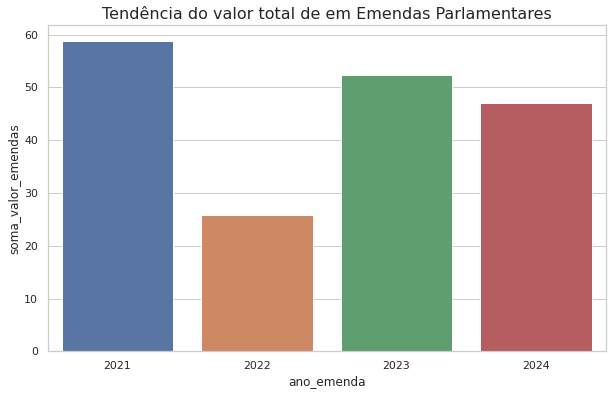

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

df_7 = df_gold["valor_empenhado"].groupby(df_gold["ano_emenda"]).sum()
df_7 = df_7.to_frame(name="soma_valor_emendas").reset_index()
df_7["soma_valor_emendas"] = df_7["soma_valor_emendas"] / 1e9

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title('Tendência do valor total de em Emendas Parlamentares', fontsize=16)
plt.ylabel('Bilhões (R$)', fontsize=12)
plt.xlabel(' ', fontsize=12)
plt.xticks()
sns.barplot(x=df_7["ano_emenda"], y=df_7["soma_valor_emendas"])

### 8) qual o volume total em dinheiro empenhado das emendas desde 2021?

In [0]:
total_empenhado = df_gold["valor_empenhado"].sum()
total_empenhado_formatado = str(total_empenhado.round(2)).replace('.', ',')

print(total_empenhado_formatado)

184014841302,61


#### 184.014.841.302,61 Reais (pouco **mais** de 184 bilhões de reais)

### 9) qual o volume de dinheiro empenhado nas emendas de relator em 2022?

In [0]:
empenhado_emenda_relator = df_gold.query("ano_emenda == 2022 and tipo_emenda == 'Emenda de Relator'")["valor_empenhado"].sum( )
print(empenhado_emenda_relator)

8640941812.17


8.640.941.812,17 Reais em emendas de relator em 2022 (Emendas Pix)

### 10) qual a tendência do volume das emendas de relator nos últimos 5 anos?

In [0]:
df_gold.query("ano_emenda > 2022")["tipo_emenda"].value_counts()

Out[40]: Emenda Individual - Transferências com Finalid...    10198
Emenda Individual - Transferências Especiais          1967
Emenda de Bancada                                      715
Emenda de Comissão                                     165
Name: tipo_emenda, dtype: Int64

Não há registros de tipo_emenda igual a Emenda de relator a partir de 2023

- Os dados originais já estão bem organizados e formatados, além disso os valores faltantes estão explícitos. Somando-se a isso, também há um glossário  e um dicionário de termos bem estruturados e com possibilidade de busca por termos. Dessa forma não houve muito desafio nas etapas de limpeza dos dados.

  dito isso, ainda assim tive grande dificuldade em entender as categorias dos valores monetários. Principalmente a questão dos dados de "Valor resto a pagar", que possuem as variações "Inscritos", "Pancelados" e "Pagos".

  Na minha percepção (não tenho experiÊncia na área administrativa) ficou difícil de entender o que de fato foi pago e o que ficou apenas empenhado. Por esse motivo resolvi explorar apenas o "valor empenhado" nas perguntas.

- As perguntas de fato respondidas são diferentes das colocadas inicialmente, por alguns motivos. São eles: a confusão de valores citada anteriormente, tentativa de tornar a análise mais interessante conforme o entendimento sobre os dados foi aumentando e adequação das perguntas aos dados. Um exemplo desse último caso foram as perguntas de número 9 e 10 que tratavam de emendas de relator nos últimos anos enquanto nos dados não há esses registros.

- No geral fico satisfeito com o trabalho feito e tenho a consciencia de que há muitas outras perguntas a se fazer e conclusões a se tomar. Trata-se de dados muito valiosos e, de certa maneira, sensíveis.

- Entender de administração pública sem dúvida seria de grande valia nesse tipo de análise.
